In [2]:
setwd('media/data')

In [3]:
library(M3C)
library(NMF)

Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:base’:

    isFALSE

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8
  To enable shared memory capabilities, try: install.extras('
NMF
')


In [4]:
library(readxl)
x <- read_excel('nature16965-s2.xlsx', sheet=3)
rownames(x) <- x$...1
x$...1 <- NULL


New names:
* `` -> ...1
Warning message:
“Setting row names on a tibble is deprecated.”

In [5]:
var_genes <- apply(x, 1, var)

# Get the gene names for the top 2000 most variable genes
select_var <- names(sort(var_genes, decreasing=TRUE))[1:2000]


# Subset 20000 matrix
highly_variable_genes <- x[select_var,]
rownames(highly_variable_genes) <- select_var
    

Warning message:
“Setting row names on a tibble is deprecated.”

In [6]:
 ## Make matrix possitive ## 
    x_pos <- nneg(as.matrix(highly_variable_genes), method=c("min"))

***M3C: Monte Carlo Reference-based Consensus Clustering***
method: reference simulation
clustering algorithm: pam
annotation: none
running simulations...


  |======================================================================| 100%


finished generating reference distribution
running consensus cluster algorithm for real data...
finished


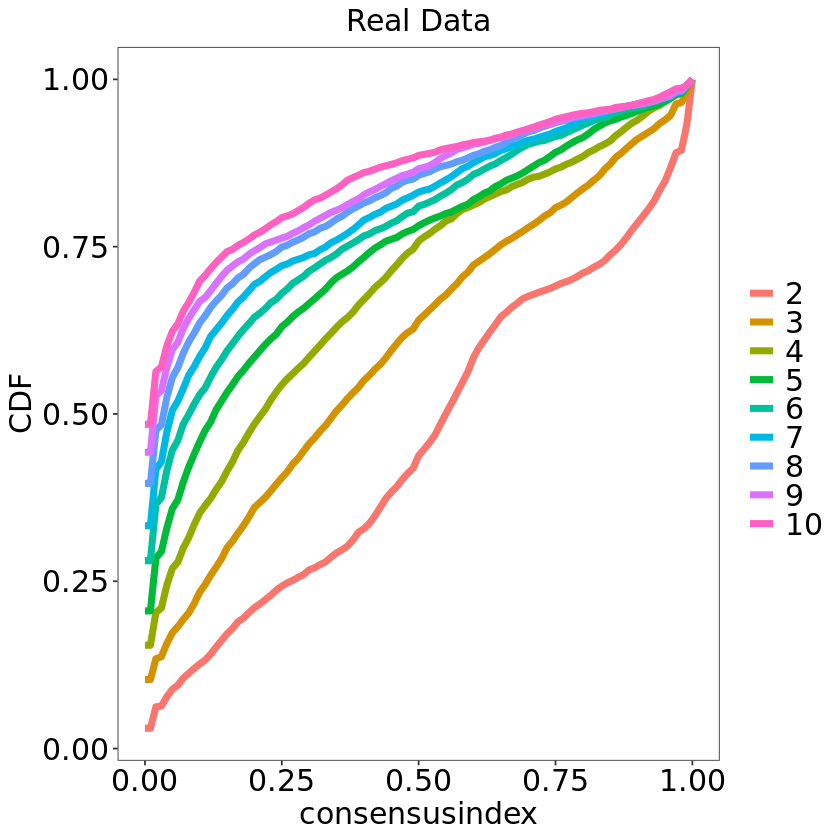

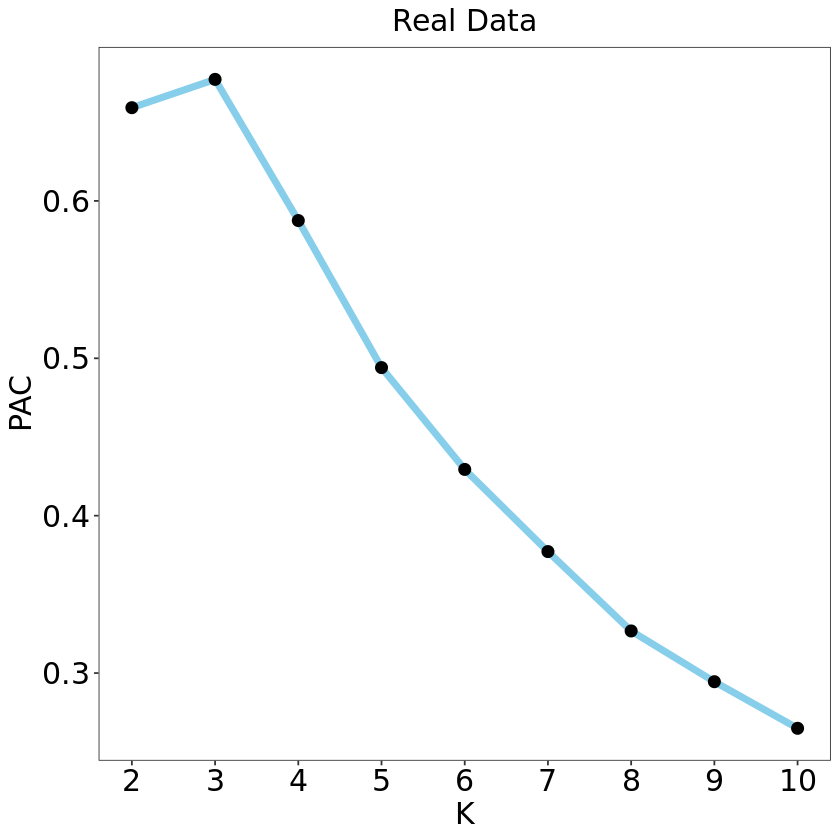

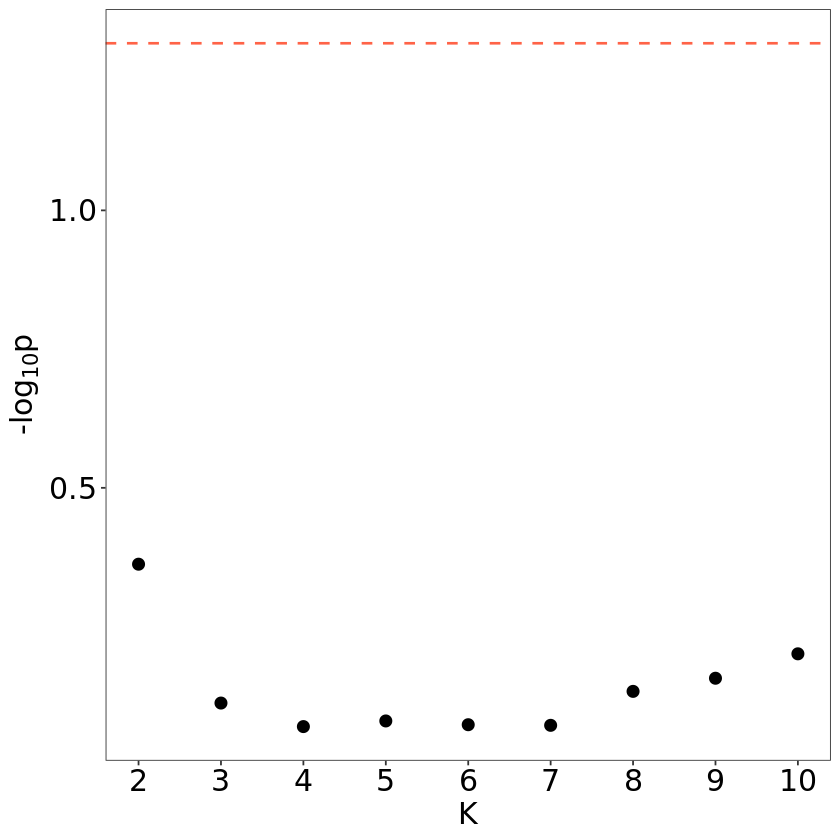

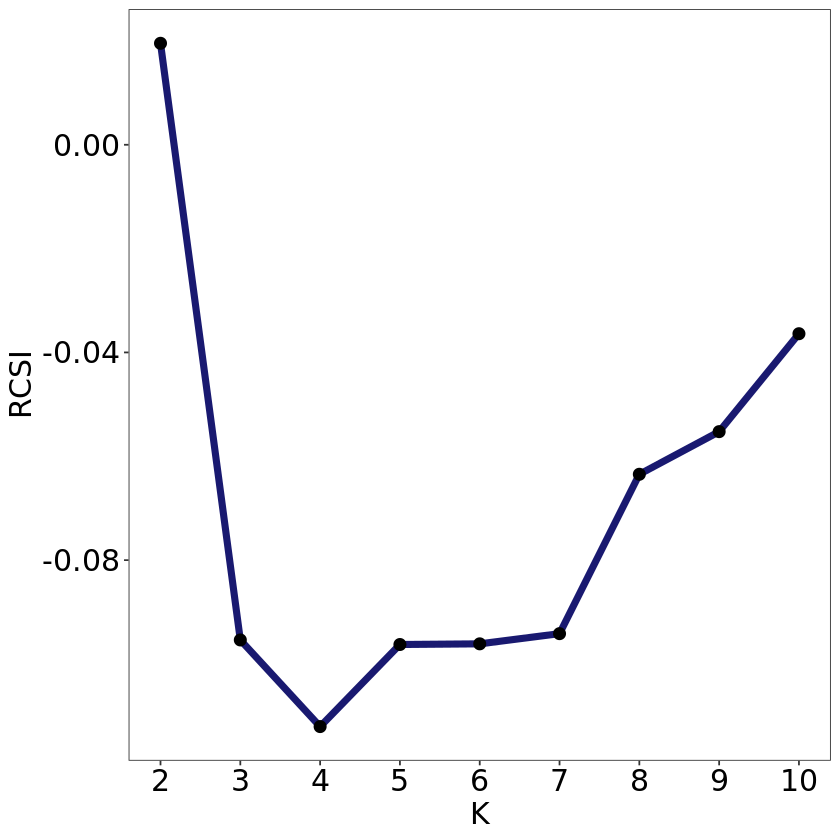

In [7]:
res <- M3C(x_pos, cores=4, des = NULL)
